In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("mldata.csv")
data.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165,70.0,Male,Biryani
2,29,171,80.0,Male,Biryani
3,27,173,102.0,Male,Biryani
4,29,164,67.0,Male,Biryani


In [9]:

                            ## Two types to convert gender into 1,0

data['gender'] = data['gender'].astype('category')
data['gender'] = data['gender'].cat.codes
data.info()

# data['gender'] = data['gender'].replace("Male",1)
# data['gender'] = data['gender'].replace("Female",0)
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       245 non-null    int64  
 1   height    245 non-null    object 
 2   weight    245 non-null    float64
 3   gender    245 non-null    int8   
 4   likeness  245 non-null    object 
dtypes: float64(1), int64(1), int8(1), object(2)
memory usage: 8.0+ KB


In [19]:
# Selection of input and output variable

x = data[['weight','gender']] # Features
y = data['likeness']          # Target Variable

In [20]:
x.head()

,weight,gender
0,76.0,1
1,70.0,1
2,80.0,1
3,102.0,1
4,67.0,1


In [21]:
y.head()

0    Biryani
1    Biryani
2    Biryani
3    Biryani
4    Biryani
Name: likeness, dtype: object

In [22]:
# Machine Learning Algorithm
from sklearn.tree import DecisionTreeClassifier

# Create and fit model
model = DecisionTreeClassifier().fit(x,y)

# Prediction
model.predict([[80,1]])

c:\Users\Hunain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Biryani'], dtype=object)

In [34]:
# how to measure accuracy of our model
# split data into test and train 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) # 80% training data and 20% Testing data
# create a model
model = DecisionTreeClassifier().fit(x_train,y_train)
predicted_values = model.predict(x_test)
predicted_values

# checking score
score = accuracy_score(y_test,predicted_values)
score


0.6122448979591837

In [40]:
# how to train and save the model

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import joblib

model = DecisionTreeClassifier().fit(x,y)
joblib.dump(model, "foodie.joblib") # Here .joblib after name is must as it will ad extension to understand the data.csv

['foodie.joblib']

In [41]:
# Assignment
# how to import/run a stored or saved  model on our data?


In [44]:
# Graph
from sklearn import tree

model = DecisionTreeClassifier().fit(x,y)

# Graphic Look
tree.export_graphviz(model,out_file = 'foodie.dot',
                    feature_names = ['age','gender'],
                    class_names = sorted(y.unique()),
                    label = 'all', 
                    rounded = True,
                    filled = True)



Decision Tree Classifier

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris.csv')
data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
X = data.iloc[ : ,:-1]
y = data.iloc[ : ,-1:]

In [15]:
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
149,5.9,3.0,5.1,1.8,virginica


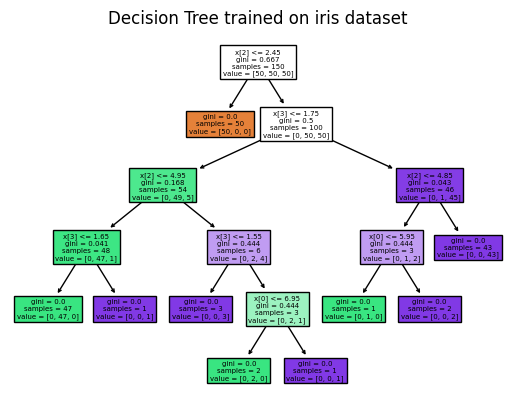

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model = DecisionTreeClassifier().fit(X,y)
plot_tree(model,filled = True)
plt.title("Decision Tree trained on iris dataset")
plt.show()

In [32]:
plt.savefig("IRIS TREE.png")

<Figure size 640x480 with 0 Axes>